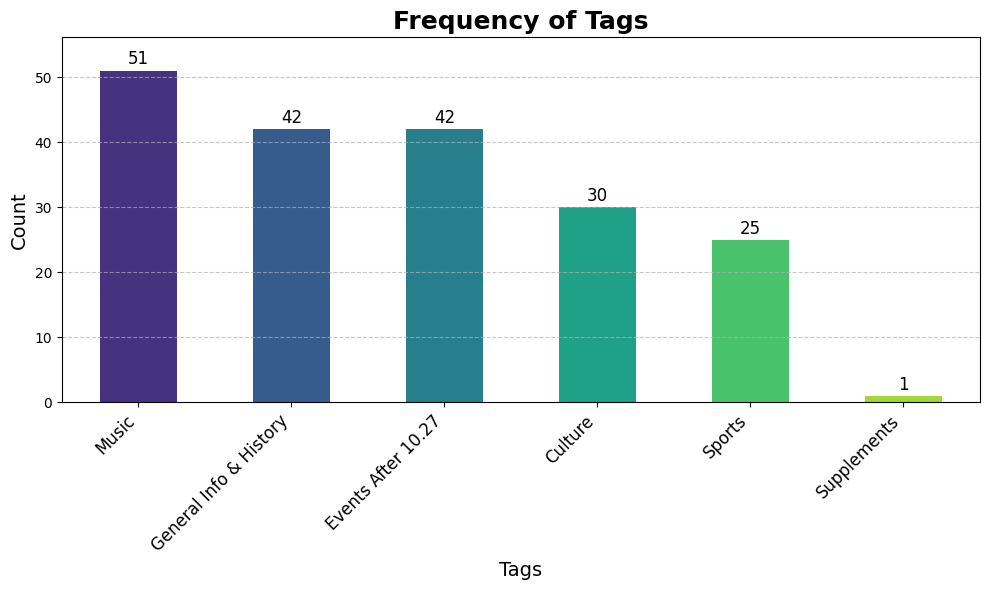

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('./data/raw/csv_data/data_source.csv')
df = pd.DataFrame(data)

# Clean and process the 'Tags' column
df['Tags'] = df['Tags'].str.split(',')
df = df.explode('Tags')
df['Tags'] = df['Tags'].str.strip()
tag_counts = df['Tags'].value_counts()

# Set up the figure
plt.figure(figsize=(10, 6))

# Use a color palette with Seaborn for a gradient effect
colors = sns.color_palette("viridis", len(tag_counts))

# Create the bar plot with custom colors
bars = tag_counts.plot(kind='bar', color=colors)

# Set title and labels
plt.title('Frequency of Tags', fontsize=18, fontweight='bold')
plt.xlabel('Tags', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=12, xytext=(0, 8),
                  textcoords='offset points')

# Set y-axis limits with some padding
plt.ylim(0, tag_counts.max() * 1.1)

# Tweak layout for better spacing
plt.tight_layout()

# Save plot as a PDF file
output_svg_file = 'tag_frequency_plot.pdf'
plt.savefig(output_svg_file, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

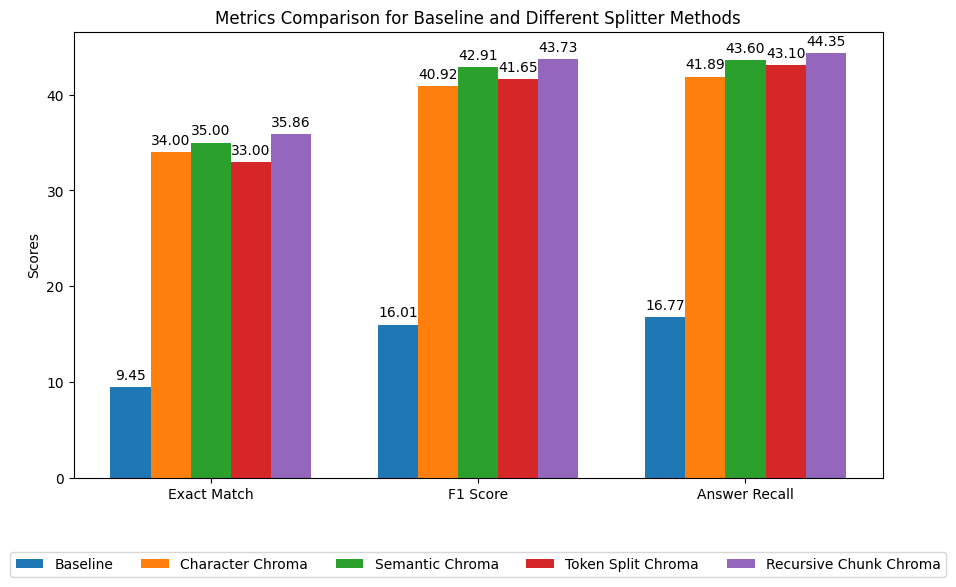

In [7]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to read JSON data from file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

file_paths = [
    './results/llama3_baseline.json',
    './results/llama3_character_chroma_top3.json',
    './results/llama3_semantic_chroma_top3.json',
    './results/llama3_token_chroma_top3.json',
    './results/llama3_recursive_chroma_top3.json'
]

# Read all data from files
data_list = [read_data_from_file(file) for file in file_paths]

# Labels for the metrics
metrics = ["Exact Match", "F1 Score", "Answer Recall"]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Number of metrics (i.e., 3 metrics: "Exact Match", "F1 Score", "Answer Recall")
n_metrics = len(metrics)

# Number of data points (i.e., number of files)
n_datasets = len(data_list)

# Set the x locations for the groups
ind = np.arange(n_metrics)

# The width of the bars
width = 0.15  # Adjusted for 5 datasets
label = ['Baseline', 'Character Chroma', 'Semantic Chroma', 'Token Split Chroma', 'Recursive Chunk Chroma']

# Plot bars for each dataset
for i, data in enumerate(data_list):
    values = [data[metric] for metric in metrics]
    bars = ax.bar(ind + i * width, values, width, label=label[i])

    # Add text annotations for each bar (rounded to 2 decimal places)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

# Add labels, title, and ticks
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison for Baseline and Different Splitter Methods')
ax.set_xticks(ind + width * (n_datasets - 1) / 2)
ax.set_xticklabels(metrics)

# Move the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=5)

# Show the plot
plt.tight_layout()
output_svg_file = 'sample100_splitter_comparison_plot.pdf'
plt.savefig(output_svg_file, format='pdf', bbox_inches='tight')
plt.show()